In [1]:
from timedataparser import load_all
import tools, torch
from matplotlib import pyplot as plt
import pandas as pd

In [14]:
nfft = 2**10

header,imcr_t,data,_ = load_all('/home/dgotzens/recording/23-10-09/')
imcr_t = [t + pd.Timedelta(days=3) for t in imcr_t]

rangedata = tools.rangedata(data, N=nfft)
imcr_ranges = tools.ranges(header, nfft)
imcr_maxrange = round(max(imcr_ranges))
imcr_level = 10*rangedata.abs().square().mean((1)).log10()


header,tina_t,data,_ = load_all('/home/dgotzens/recording/23-10-17_Tina/')
rangedata = tools.rangedata(data, N=nfft)
tina_ranges = tools.ranges(header, nfft)
tina_maxrange = round(max(tina_ranges))
tina_level = 10*rangedata.abs().square().mean((1)).log10()


loaded data with shape torch.Size([1022, 192, 983])
loaded data with shape torch.Size([2048, 768, 992])
converting to real spectrum!


/home/dgotzens/localstorage/tmp/ipykernel_3263971/1905164828.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


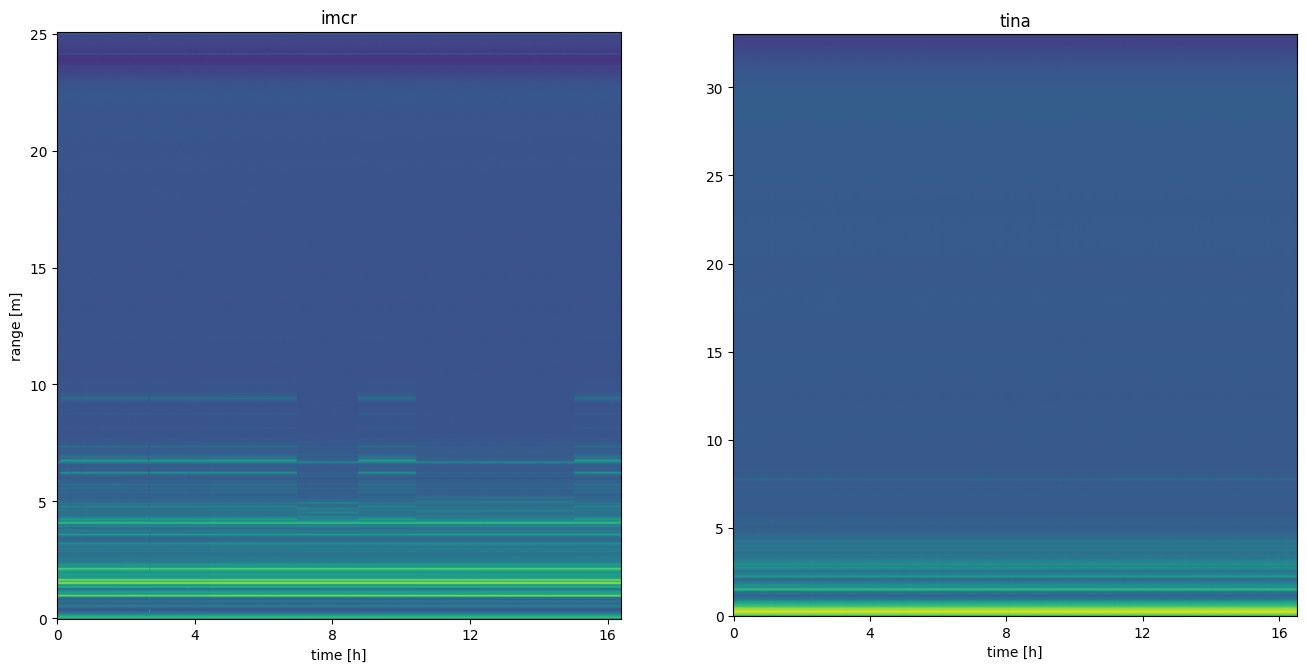

In [17]:
# Range over time
f,ax = plt.subplots(1,2, figsize=(16,9))

ax[0].imshow(imcr_level, origin='lower', vmin=-40, vmax=40)
ax[0].set_title('imcr')
ax[0].set_xlabel('time [h]')
ax[0].set_ylabel('range [m]')
ax[0].set_yticks(range(0,nfft+1,nfft*5//imcr_maxrange), range(0,imcr_maxrange+1,5))
ax[0].set_xticks(range(0, len(imcr_t)+1,240), range(0,len(imcr_t)//60+1, 4))

ax[1].imshow(tina_level, origin='lower', vmin=-40, vmax=40)
ax[1].set_title('tina')
ax[1].set_xlabel('time [h]')
ax[1].set_yticks(range(0,nfft+1,nfft*5//tina_maxrange), range(0,tina_maxrange+1,5))
ax[1].set_xticks(range(0, len(tina_t)+1,240), range(0,len(tina_t)//60+1, 4))

f.show()


307 409


/home/dgotzens/localstorage/tmp/ipykernel_3263971/760758576.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/home/dgotzens/localstorage/tmp/ipykernel_3263971/760758576.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


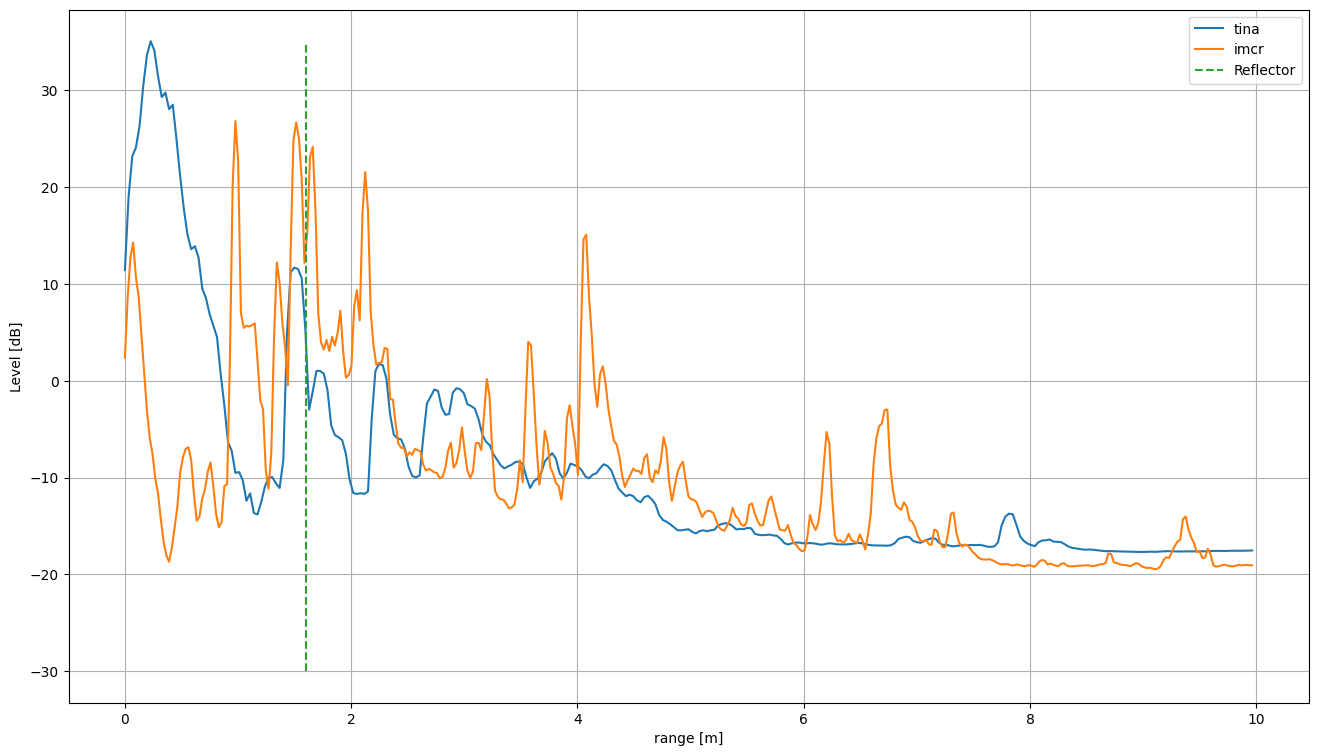

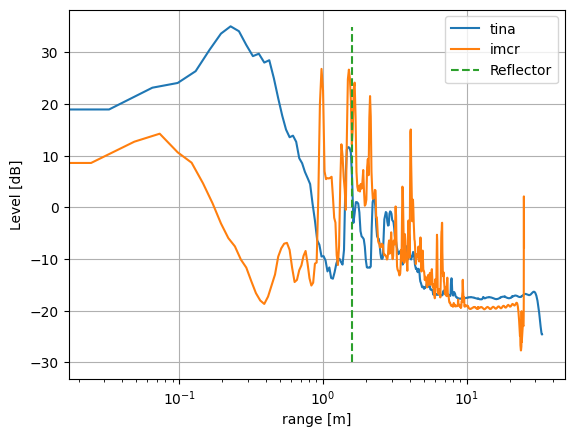

In [24]:
refly = [-30,35]
reflx = [1.6,1.6]
# mean Range
f,ax = plt.subplots(1, figsize=(16,9))

mtina = max([m for m,r in enumerate(tina_ranges) if r<10])
mimcr = max([m for m,r in enumerate(imcr_ranges) if r<10])
print(mtina, mimcr)
ax.plot(tina_ranges[:mtina],tina_level[:mtina].mean(-1), label='tina')
ax.plot(imcr_ranges[:mimcr],imcr_level[:mimcr].mean(-1), label='imcr')
ax.plot(reflx,refly,label='Reflector',linestyle='--')
ax.set_xlabel('range [m]')
ax.set_ylabel('Level [dB]')
ax.grid()
ax.legend()

f.show()

# mean Range
f,ax = plt.subplots(1)

ax.semilogx(tina_ranges,tina_level.mean(-1), label='tina')
ax.semilogx(imcr_ranges,imcr_level.mean(-1), label='imcr')
ax.semilogx(reflx,refly,label='Reflector',linestyle='--')
ax.set_xlabel('range [m]')
ax.set_ylabel('Level [dB]')
ax.grid()
ax.legend()

f.show()


In [26]:
nfft = 2**20

header,t_tina,data,_ = load_all('/home/dgotzens/recording/23-10-17_Tina/')
tina_ranges = tools.ranges(header, nfft)
tina_rmax = tools.reflidx(tools.rangedata(data[:,0,:], N=nfft), torch.tensor([m for m,r in enumerate(tina_ranges) if 1.4<r<2]))

header,t_imcr,data,_ = load_all('/home/dgotzens/recording/23-10-09/')
t_imcr = [t + pd.Timedelta(days=7) for t in t_imcr]
imcr_ranges = tools.ranges(header, nfft)
imcr_rmax = tools.reflidx(tools.rangedata(data[:,0,:], N=nfft), torch.tensor([m for m,r in enumerate(imcr_ranges) if 1.4<r<2]))



loaded data with shape torch.Size([2048, 768, 992])
converting to real spectrum!
loaded data with shape torch.Size([1022, 192, 983])


/home/dgotzens/localstorage/tmp/ipykernel_3263971/3871641478.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


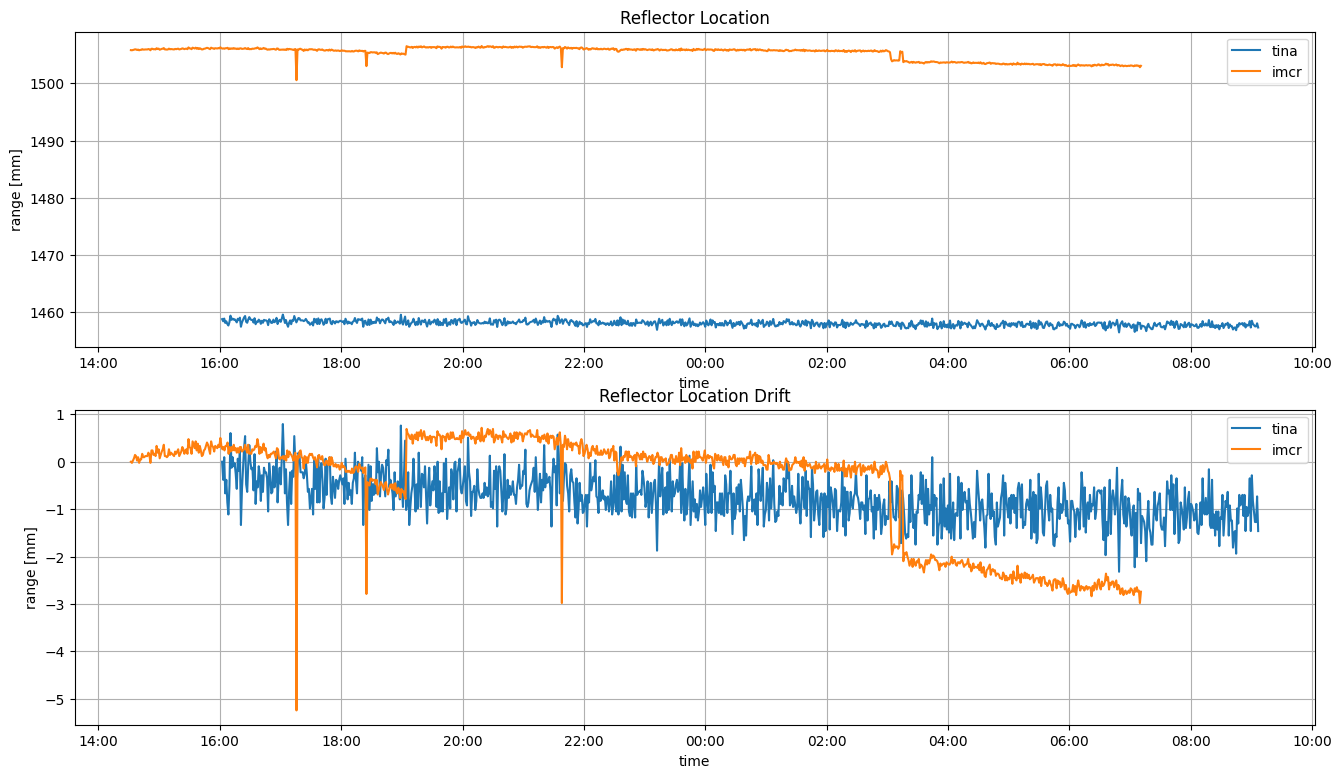

In [27]:
f, (bottom, top) = plt.subplots(2, figsize=(16,9))
top.plot(t_tina, [1e3*(tina_ranges[m]-tina_ranges[tina_rmax[0]]) for m in tina_rmax], label='tina')
top.plot(t_imcr, [1e3*(imcr_ranges[m]-imcr_ranges[imcr_rmax[0]]) for m in imcr_rmax], label='imcr')

bottom.plot(t_tina, [1e3*(tina_ranges[m]) for m in tina_rmax], label='tina')
bottom.plot(t_imcr, [1e3*(imcr_ranges[m]) for m in imcr_rmax], label='imcr')

top.xaxis.set_major_formatter(tools.hhmm)
top.set_xlabel('time')
top.set_ylabel('range [mm]')
top.legend()
top.grid()
top.set_title('Reflector Location Drift')

bottom.xaxis.set_major_formatter(tools.hhmm)
bottom.set_xlabel('time')
bottom.set_ylabel('range [mm]')
bottom.legend()
bottom.grid()
bottom.set_title('Reflector Location')

f.show()

loaded data with shape torch.Size([1022, 192, 983])
loaded data with shape torch.Size([2048, 768, 992])
converting to real spectrum!


/home/dgotzens/localstorage/tmp/ipykernel_3328881/726728924.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


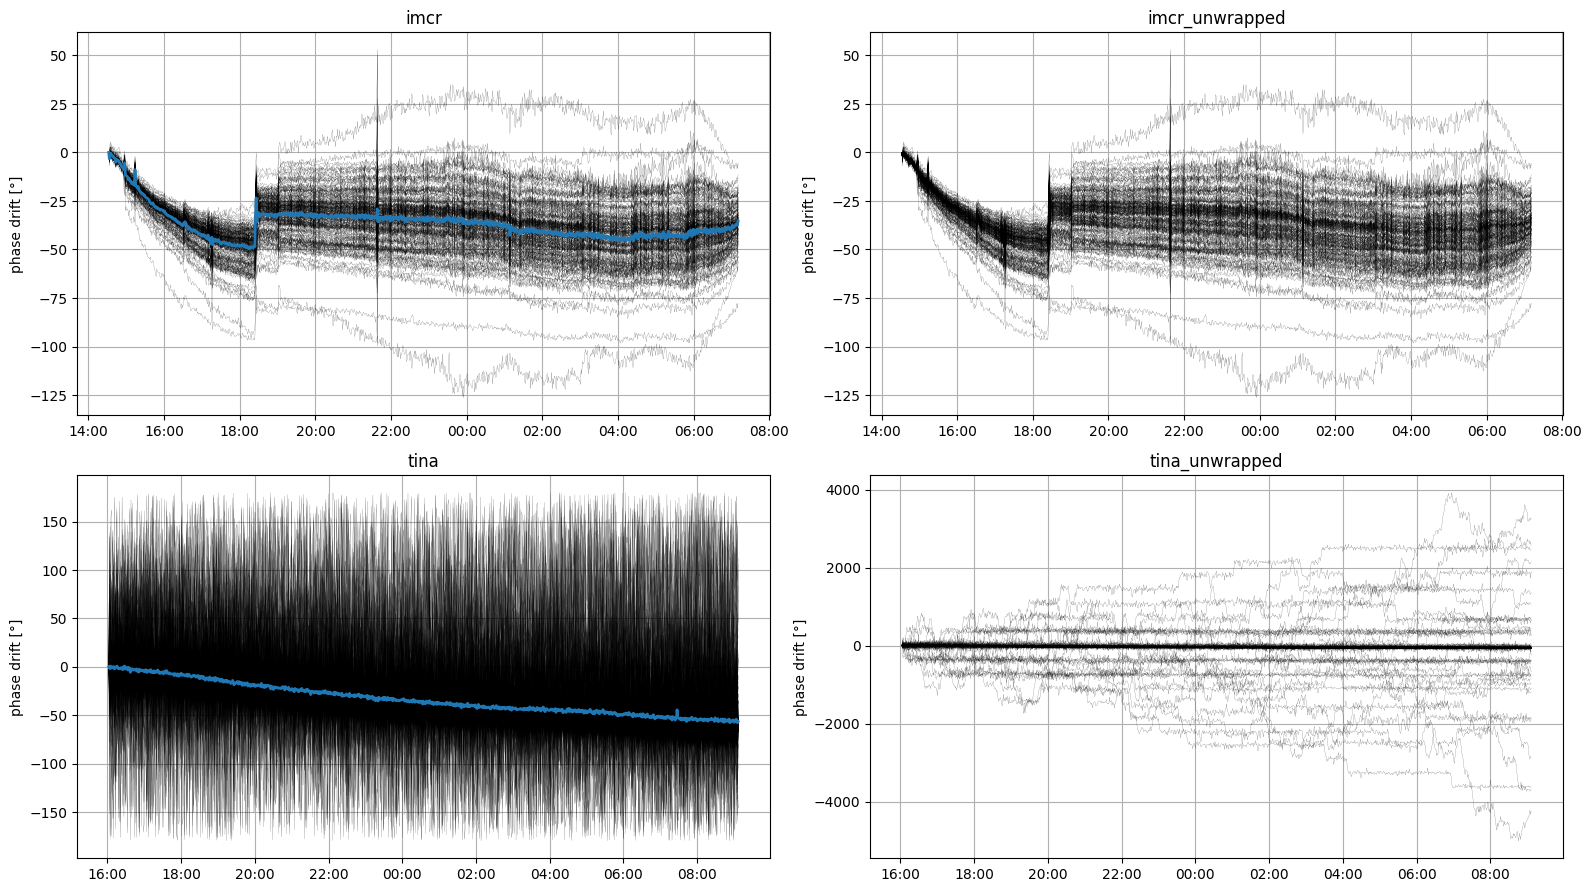

In [2]:
nfft = 2**11

f,ax = plt.subplots(2,2, figsize=(16,9))

header,time,data,_ = load_all('/home/dgotzens/recording/23-10-09/')
rangedata = tools.rangedata(data, N=nfft)
M,K,L = rangedata.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(rangedata.mean(1),search_idx)
drift = torch.empty((K,L))
for k in range(K):
    drift[k,:] = 180/torch.pi*tools.drift(rangedata[:,k,:], m_refl).angle()
    ax[0,0].plot(time,drift[k,:],'k-', linewidth=0.1)
    ax[0,1].plot(time,tools.unwrap(drift[k,:], pi=180),'k-', linewidth=0.1)
ax[0,0].plot(time,drift.mean(0), linewidth=2, label='mean')
ax[0,0].set_title('imcr')
ax[0,1].set_title('imcr_unwrapped')
# top.set_ylim(-2*drift.var().sqrt(), 2*drift.var().sqrt())

header,time,data,_ = load_all('/home/dgotzens/recording/23-10-17_Tina/')
rangedata = tools.rangedata(data, N=nfft)
M,K,L = rangedata.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(rangedata.mean(1),search_idx)
drift = torch.empty((K,L))
for k in range(K):
    drift[k,:] = 180/torch.pi*tools.drift(rangedata[:,k,:], m_refl).angle()
    ax[1,0].plot(time,drift[k,:],'k-', linewidth=0.1)
    ax[1,1].plot(time,tools.unwrap(drift[k,:], pi=180),'k-', linewidth=0.1)
ax[1,0].plot(time,drift.mean(0), linewidth=2, label='mean')
ax[1,0].set_title('tina')
ax[1,1].set_title('tina_unwrapped')

for n in range(4):
    ax[n//2, n%2].xaxis.set_major_formatter(tools.hhmm)
    ax[n//2, n%2].set_ylabel('phase drift [°]')
    ax[n//2, n%2].grid()

f.tight_layout(pad=1)
f.show()

In [3]:
nfft = 2**12
header,time,data,_ = load_all('/home/dgotzens/recording/23-10-04/')
rangedata=tools.rangedata(data,nfft)
M,K,L = data.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(rangedata.mean(1),search_idx)
dphase = 180/torch.pi*tools.drift(rangedata, m_refl).angle()

loaded data with shape torch.Size([1022, 192, 92])


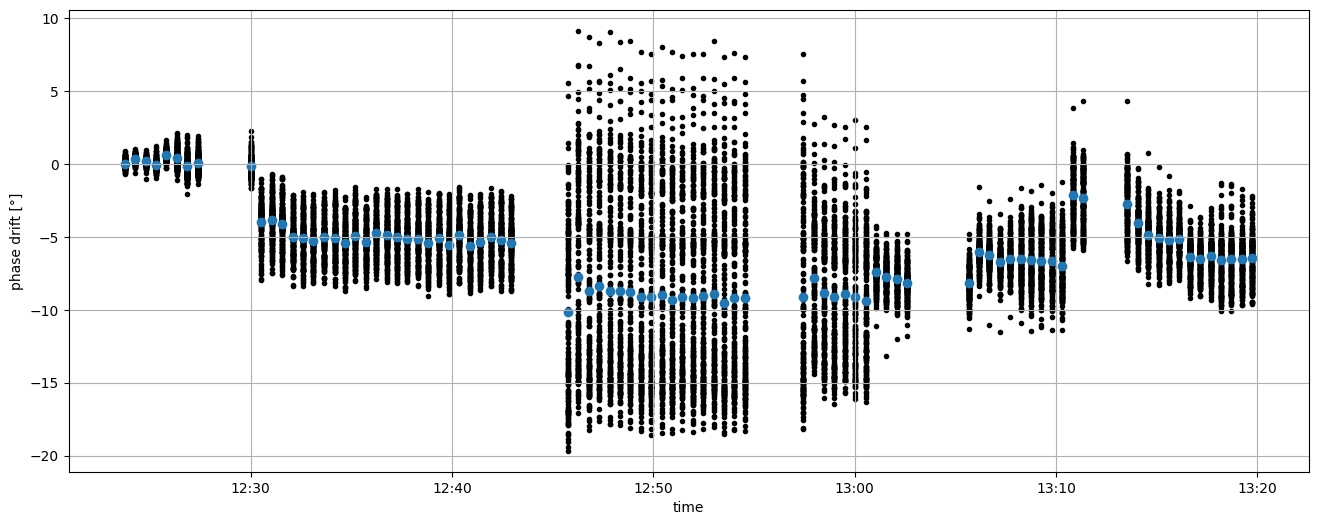

In [7]:
plt.figure(figsize=(16,6))
for k in range(K):
    plt.scatter(time, dphase[k,:], color='black', marker='.')
plt.scatter(time, dphase.mean(0))
plt.gca().xaxis.set_major_formatter(tools.hhmm)
plt.ylabel('phase drift [°]')
plt.xlabel('time')
plt.grid()
plt.show()

In [18]:
nfft = 2**12
header,time,data,temp = load_all('/home/dgotzens/recording/23-10-09/')
rangedata=tools.rangedata(data,nfft)
M,K,L = data.shape
search_idx = torch.tensor([m for m,r in enumerate(tools.ranges(header, nfft)) if 1.4<r<2])
m_refl = tools.reflidx(rangedata.mean(1),search_idx)
phase = 180/torch.pi*tools.unwrap(tools.drift(rangedata, m_refl).angle())
dphase = 60*tools.runavg(tools.deriv(phase), n=40)

loaded data with shape torch.Size([1022, 192, 983])


/home/dgotzens/localstorage/tmp/ipykernel_581825/2075910839.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()
/home/dgotzens/localstorage/tmp/ipykernel_581825/2075910839.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


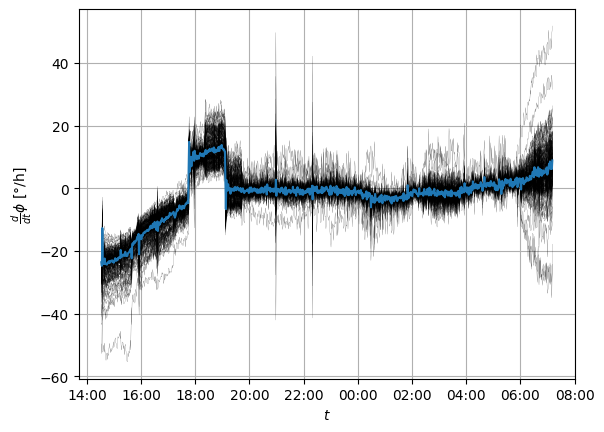

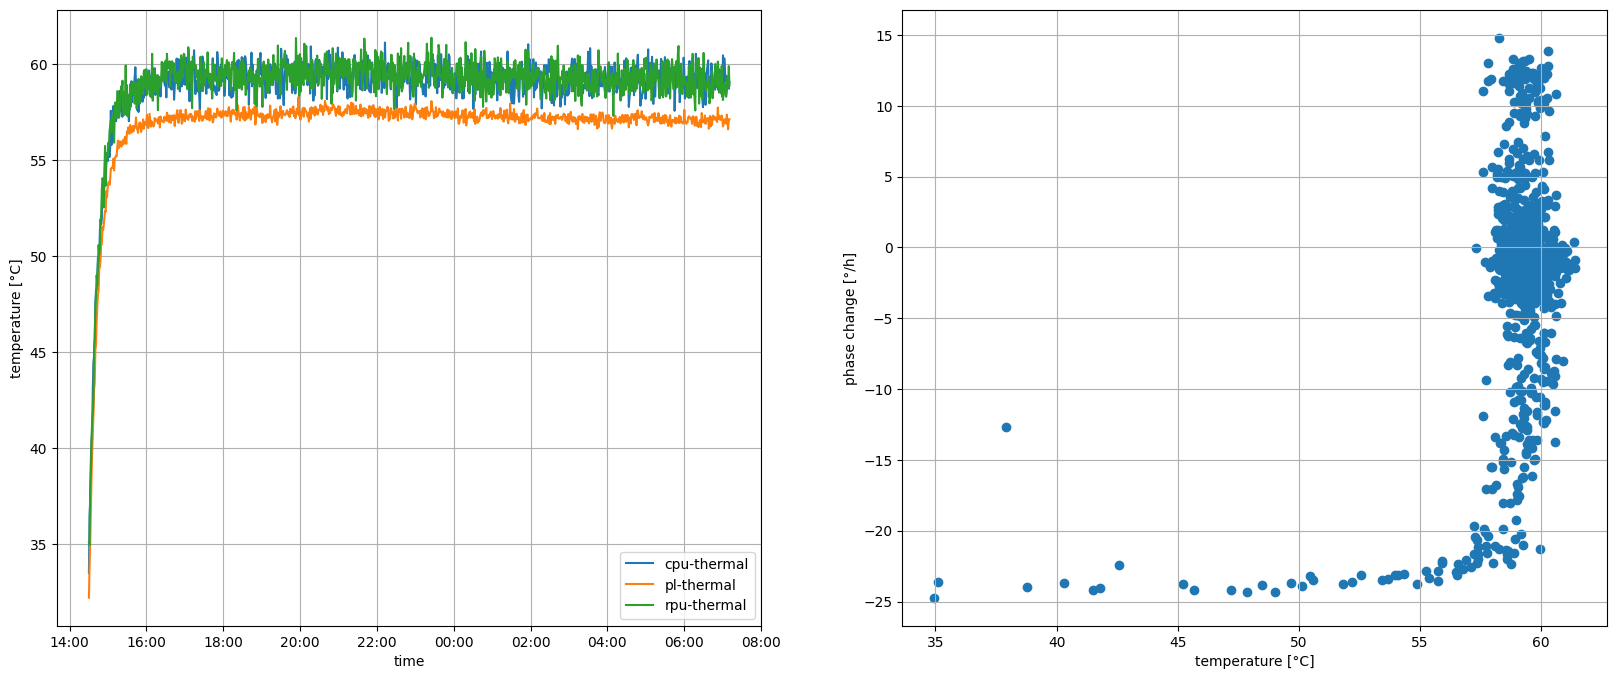

In [20]:
f, top = plt.subplots(1)
for k in range(K):
    top.plot(time, dphase[k,:], color='black', linewidth=0.1)    
top.plot(time, dphase.mean(0))

top.set_ylabel(r'$\frac{d}{dt} \phi$ [°/h]')
top.set_xlabel(r'$t$')
top.xaxis.set_major_formatter(tools.hhmm)
top.grid()
f.show()
f,(left,right) = plt.subplots(1,2,figsize=(20,8))

for key in temp.keys():
    t = temp[key].keys()
    T = [val/1000 for val in temp[key].values()]
    left.plot(t,T, label=key)

left.xaxis.set_major_formatter(tools.hhmm)
left.set_ylabel('temperature [°C]')
left.set_xlabel('time')
left.legend()
left.grid()

right.scatter([val/1000 for l, val in enumerate(temp['rpu-thermal'].values()) if l<L], dphase.mean(0))
right.set_xlabel('temperature [°C]')
right.set_ylabel('phase change [°/h]')
right.grid()

f.show()
